# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import shap
import seaborn as sns

import math


C:\Users\moham\anaconda3\envs\NProject1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading the dataset

In [4]:
data_csv = pd.read_csv(r"C:\Users\moham\Downloads\equipment_anomaly_data.csv")

# Exploratory data analysis

Box plots of the sensors

C:\Users\moham\AppData\Local\Temp\ipykernel_22140\1725621524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\moham\AppData\Local\Temp\ipykernel_22140\1725621524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\moham\AppData\Local\Temp\ipykernel_22140\1725621524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\moham\AppData\Local\Temp\ipykernel_22140\1725621524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

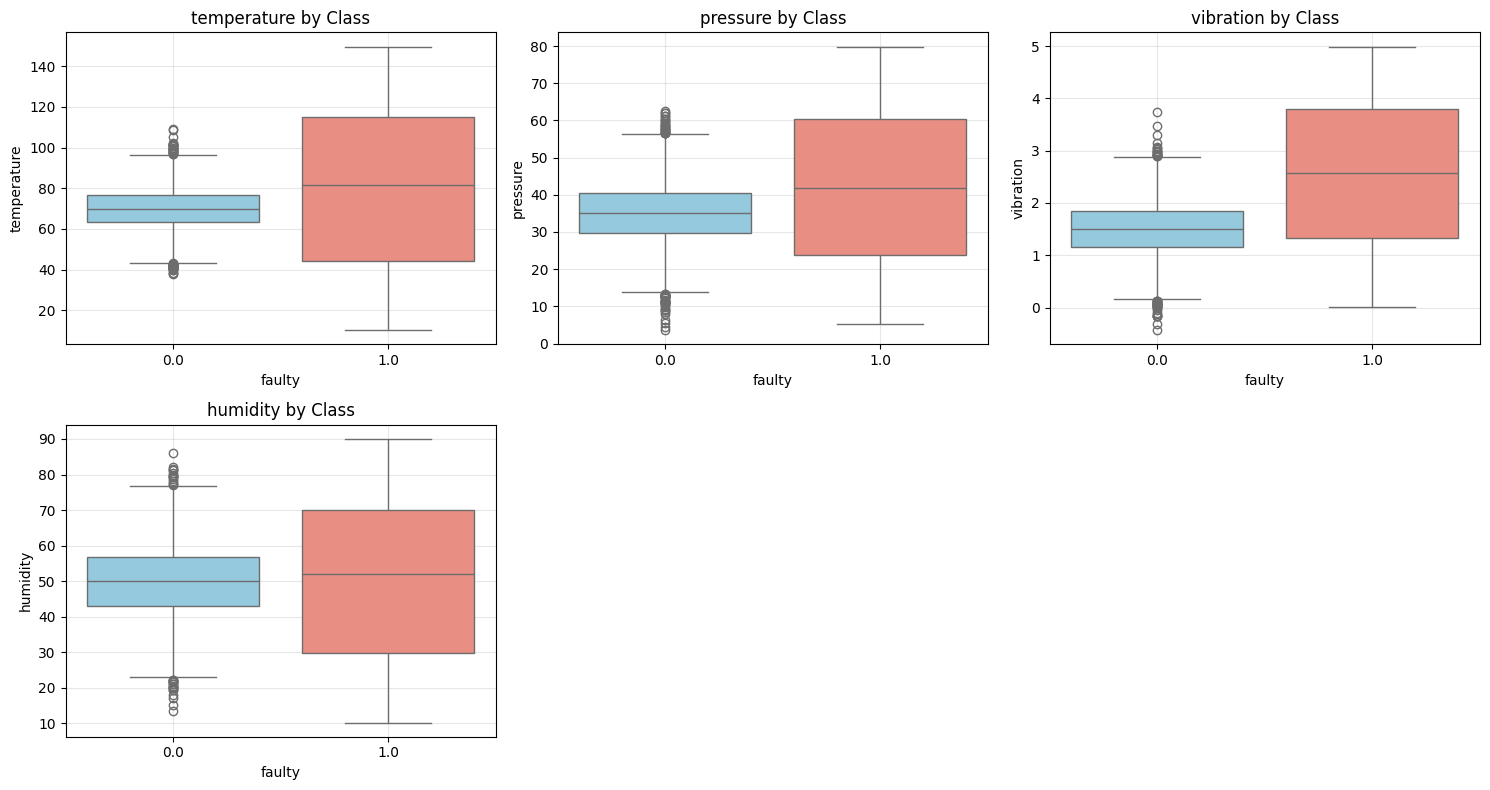

In [5]:

target_col = 'faulty'

num_cols = data_csv.select_dtypes(include='number').columns.drop(target_col)


n_cols = 3  
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()


for i, col in enumerate(num_cols):
    sns.boxplot(
        x=target_col,
        y=col,
        data=data_csv,
        palette=['skyblue', 'salmon'],
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Class")
    axes[i].grid(alpha=0.3)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Scatter plot temperature and pressure for Non faulty and faulty obserations

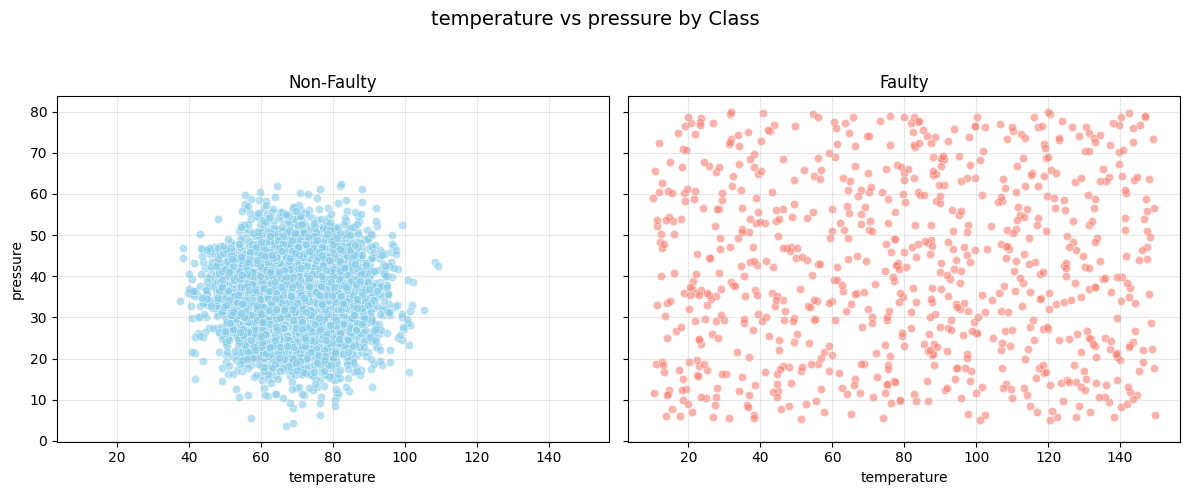

In [6]:
feature_x = 'temperature'
feature_y = 'pressure'
target_col = 'faulty'

df_non_faulty = data_csv[data_csv[target_col] == 0.0]
df_faulty     = data_csv[data_csv[target_col] == 1.0]


fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)


sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_non_faulty,
    color='skyblue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Non-Faulty')
axes[0].set_xlabel(feature_x)
axes[0].set_ylabel(feature_y)
axes[0].grid(alpha=0.3)

# Faulty Class
sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_faulty,
    color='salmon',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Faulty')
axes[1].set_xlabel(feature_x)
axes[1].set_ylabel(feature_y)
axes[1].grid(alpha=0.3)

plt.suptitle(f"{feature_x} vs {feature_y} by Class", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Scatter plot vibration and pressure for Non faulty and faulty obserations

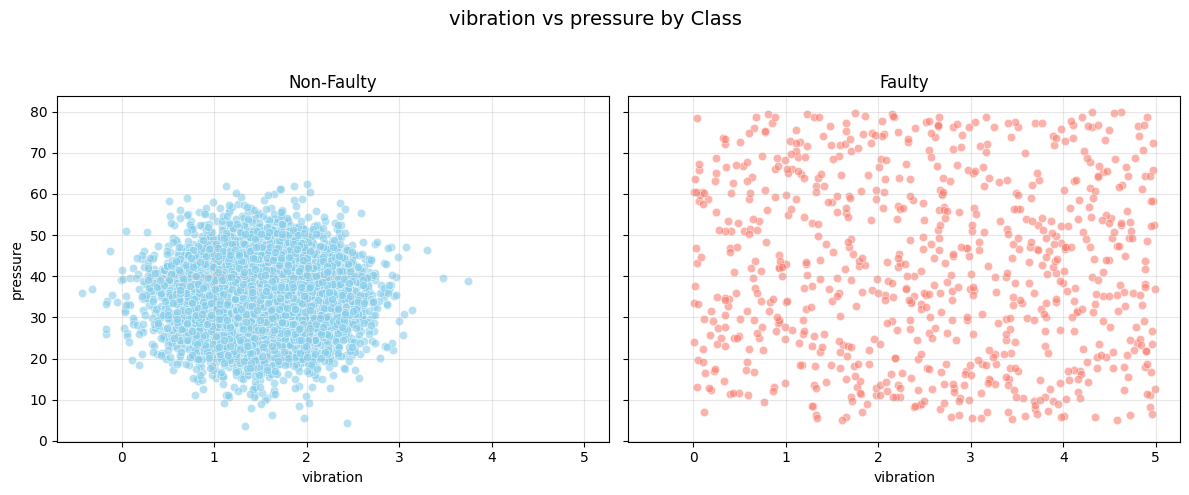

In [7]:


feature_x = 'vibration'
feature_y = 'pressure'
target_col = 'faulty'


df_non_faulty = data_csv[data_csv[target_col] == 0.0]
df_faulty     = data_csv[data_csv[target_col] == 1.0]

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_non_faulty,
    color='skyblue',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Non-Faulty')
axes[0].set_xlabel(feature_x)
axes[0].set_ylabel(feature_y)
axes[0].grid(alpha=0.3)


sns.scatterplot(
    x=feature_x,
    y=feature_y,
    data=df_faulty,
    color='salmon',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Faulty')
axes[1].set_xlabel(feature_x)
axes[1].set_ylabel(feature_y)
axes[1].grid(alpha=0.3)

plt.suptitle(f"{feature_x} vs {feature_y} by Class", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Distribution plots of all sensors

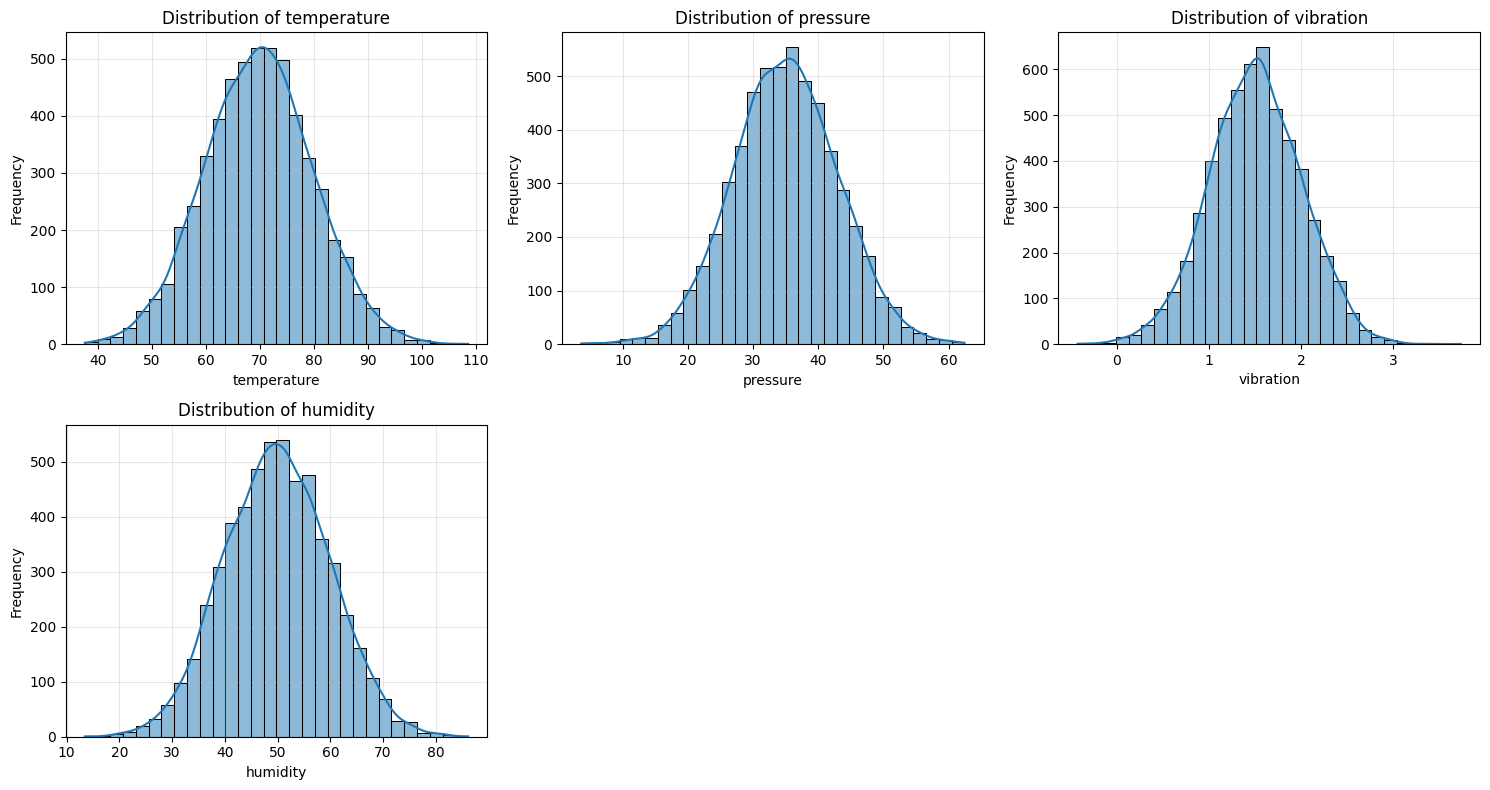

In [14]:

num_cols = no_faulty_train.select_dtypes(include='number').columns

n_cols = 3   
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        no_faulty_train[col],
        kde=True,
        bins=30,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Creating training and testing sets for model implementation

In [9]:
x_faulty,y_faulty = train_test_split(data_csv[data_csv['faulty'] == 0.0],test_size = 0.2,shuffle = True)

In [10]:
faulty_data = data_csv[data_csv['faulty'] == 0.0]

no_faulty_train, no_faulty_test = train_test_split(faulty_data, test_size=0.2, shuffle=True, random_state=42)

In [11]:
no_faulty_train = no_faulty_train.drop(['faulty','location','equipment'],axis = 1)

In [12]:
faulty_data = data_csv[data_csv['faulty'] == 1.0]
test = pd.concat([no_faulty_test, faulty_data], ignore_index=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)
X_test = test.drop(columns=['faulty']) 
y_test = test['faulty']               


In [13]:
X_test = X_test.drop(['location','equipment'],axis = 1)

# Scaling and modelling the data

One class SVM

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
ocsvm.fit(X_train_scaled)

,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,tol,0.001
,nu,0.05
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


Predicting for test set and heatmap of classification results

              precision    recall  f1-score   support

      Normal       0.97      0.94      0.95      1381
      Faulty       0.90      0.95      0.92       767

    accuracy                           0.94      2148
   macro avg       0.93      0.94      0.94      2148
weighted avg       0.94      0.94      0.94      2148

[[1298   83]
 [  41  726]]


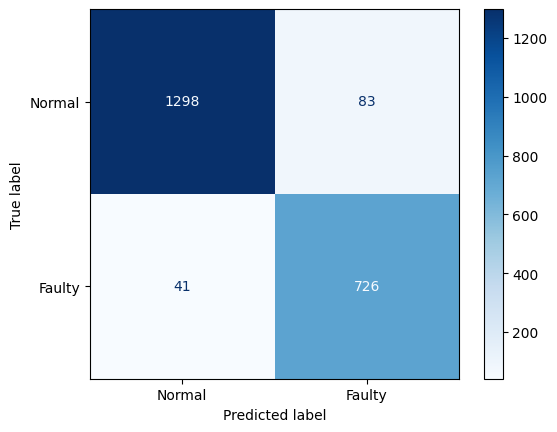

In [16]:
y_pred = ocsvm.predict(X_test_scaled)
y_pred = [0 if i == 1 else 1 for i in y_pred]
print(classification_report(y_test, y_pred, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Isolation forest modelling

In [19]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

iso_forest.fit(X_train_scaled)


y_pred_train = iso_forest.predict(X_train_scaled)
y_pred_test = iso_forest.predict(X_test_scaled)


Prediction using the fitted isolation model

              precision    recall  f1-score   support

      Normal       0.97      0.94      0.95      1381
      Faulty       0.90      0.94      0.92       767

    accuracy                           0.94      2148
   macro avg       0.93      0.94      0.94      2148
weighted avg       0.94      0.94      0.94      2148

[[1304   77]
 [  47  720]]


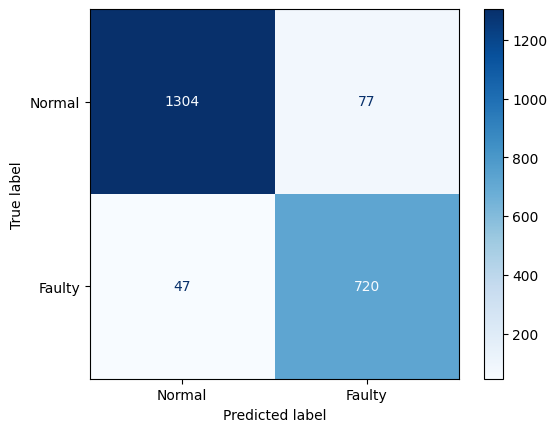

In [20]:

y_pred = iso_forest.predict(X_test_scaled)

y_pred = [0 if i == 1 else 1 for i in y_pred]

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, target_names=['Normal', 'Faulty']))

cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate normal and faulty
normal_data = data_csv[data_csv['faulty'] == 0.0]
faulty_data = data_csv[data_csv['faulty'] == 1.0]

# Train on normal only
normal_train, normal_test = train_test_split(
    normal_data,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# Build test set (normal_test + all faulty)
test = pd.concat([normal_test, faulty_data], ignore_index=True)
test = test.sample(frac=1, random_state=42).reset_index(drop=True)

# Split X and y
X_train = normal_train.drop(['faulty','location','equipment'], axis=1)

X_test = test.drop(['faulty','location','equipment'], axis=1)
y_test = test['faulty']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

iso = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

ocsvm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)

In [34]:
# Isolation Forest
iso.fit(X_train)
pred_if = iso.predict(X_test)
pred_if = (pred_if == -1).astype(int)  # map -1 to 1 (faulty)

# One-Class SVM
ocsvm_model.fit(X_train_scaled)
pred_oc = ocsvm_model.predict(X_test_scaled)
pred_oc = (pred_oc == -1).astype(int)


In [35]:
from sklearn.metrics import classification_report

print("Isolation Forest")
print(classification_report(y_test, pred_if))

print("One-Class SVM")
print(classification_report(y_test, pred_oc))


Isolation Forest
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      1381
         1.0       0.90      0.94      0.92       767

    accuracy                           0.94      2148
   macro avg       0.93      0.94      0.94      2148
weighted avg       0.94      0.94      0.94      2148

One-Class SVM
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      1381
         1.0       0.90      0.95      0.92       767

    accuracy                           0.94      2148
   macro avg       0.93      0.94      0.94      2148
weighted avg       0.94      0.94      0.94      2148



In [36]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

# Contingency table
both_correct = np.sum((pred_if == y_test) & (pred_oc == y_test))
if_correct = np.sum((pred_if == y_test) & (pred_oc != y_test))
oc_correct = np.sum((pred_if != y_test) & (pred_oc == y_test))
both_wrong = np.sum((pred_if != y_test) & (pred_oc != y_test))

table = [[both_correct, if_correct],
         [oc_correct, both_wrong]]

result = mcnemar(table, exact=True)
print("McNemar p-value:", result.pvalue)


McNemar p-value: 1.0


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

n_runs = 10

rec_if = []
rec_oc = []

for i in range(n_runs):
    
    normal_train, normal_test = train_test_split(
        normal_data,
        test_size=0.2,
        shuffle=True,
        random_state=i
    )
    
    test = pd.concat([normal_test, faulty_data])
    test = test.sample(frac=1, random_state=i)
    
    X_train = normal_train.drop(['faulty','location','equipment'], axis=1)
    X_test = test.drop(['faulty','location','equipment'], axis=1)
    y_test = test['faulty']
    
    # Isolation Forest
    iso.fit(X_train)
    pred_if = (iso.predict(X_test) == -1).astype(int)
    rec_if.append(recall_score(y_test, pred_if, pos_label=1))
    
    # OC-SVM
    ocsvm.fit(X_train)
    pred_oc = (ocsvm.predict(X_test) == -1).astype(int)
    rec_oc.append(recall_score(y_test, pred_oc, pos_label=1))

print("Isolation Forest mean recall:", np.mean(rec_if))
print("Isolation Forest std:", np.std(rec_if))

print("OC-SVM mean recall:", np.mean(rec_oc))
print("OC-SVM std:", np.std(rec_oc))


Isolation Forest mean recall: 0.9305084745762713
Isolation Forest std: 0.0034519432320400875
OC-SVM mean recall: 0.9979139504563234
OC-SVM std: 0.0008648304538084793


In [38]:
import time

start = time.time()
iso.predict(X_test)
print("Isolation Forest inference time:", time.time() - start)

start = time.time()
ocsvm.predict(X_test)
print("OC-SVM inference time:", time.time() - start)


Isolation Forest inference time: 0.06510353088378906
OC-SVM inference time: 1.171797275543213


In [39]:
import pickle, os

pickle.dump(iso, open("iso.pkl","wb"))
pickle.dump(ocsvm, open("ocsvm.pkl","wb"))

print("IF size (KB):", os.path.getsize("iso.pkl")/1024)
print("OC-SVM size (KB):", os.path.getsize("ocsvm.pkl")/1024)


IF size (KB): 1090.3447265625
OC-SVM size (KB): 170.30859375


In [40]:
X_test_noisy = X_test + np.random.normal(0, 0.01, X_test.shape)

pred_if = (iso.predict(X_test_noisy) == -1).astype(int)
pred_oc = (ocsvm.predict(X_test_noisy) == -1).astype(int)

print("IF noisy recall:",
      recall_score(y_test, pred_if, pos_label=1))

print("OC noisy recall:",
      recall_score(y_test, pred_oc, pos_label=1))


IF noisy recall: 0.9295958279009127
OC noisy recall: 0.9973924380704041


In [41]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import recall_score

n_runs = 100  # more runs for better bootstrap estimate

rec_if = []
rec_oc = []

# Combine normal + faulty data for bootstrapping
full_data = pd.concat([normal_data, faulty_data])

for i in range(n_runs):
    # Bootstrap sample from full data
    boot_sample = resample(full_data, replace=True, n_samples=len(full_data), random_state=i)
    
    # Split into train/test
    X_train = boot_sample[boot_sample['faulty'] == 0].drop(['faulty','location','equipment'], axis=1)
    y_train = boot_sample[boot_sample['faulty'] == 0]['faulty']
    
    test = pd.concat([
        boot_sample[boot_sample['faulty'] == 1],  # all faulty in bootstrap
        boot_sample[boot_sample['faulty'] == 0].sample(frac=0.2, random_state=i)  # subset normal
    ])
    X_test = test.drop(['faulty','location','equipment'], axis=1)
    y_test = test['faulty']
    
    # Isolation Forest
    iso.fit(X_train)
    pred_if = (iso.predict(X_test) == -1).astype(int)
    rec_if.append(recall_score(y_test, pred_if, pos_label=1))
    
    # One-Class SVM
    ocsvm.fit(X_train)
    pred_oc = (ocsvm.predict(X_test) == -1).astype(int)
    rec_oc.append(recall_score(y_test, pred_oc, pos_label=1))

# Summary
print("Isolation Forest mean recall:", np.mean(rec_if), "±", np.std(rec_if))
print("OC-SVM mean recall:", np.mean(rec_oc), "±", np.std(rec_oc))


Isolation Forest mean recall: 0.9308225388722561 ± 0.01008598169554654
OC-SVM mean recall: 0.9986170163976013 ± 0.0018507188123636292


In [42]:
import numpy as np

ci_low_if = np.percentile(rec_if, 2.5)
ci_high_if = np.percentile(rec_if, 97.5)

ci_low_oc = np.percentile(rec_oc, 2.5)
ci_high_oc = np.percentile(rec_oc, 97.5)

print(f"Isolation Forest 95% CI: [{ci_low_if:.3f}, {ci_high_if:.3f}]")
print(f"OC-SVM 95% CI: [{ci_low_oc:.3f}, {ci_high_oc:.3f}]")


Isolation Forest 95% CI: [0.909, 0.948]
OC-SVM 95% CI: [0.994, 1.000]


<Axes: xlabel='humidity', ylabel='Density'>

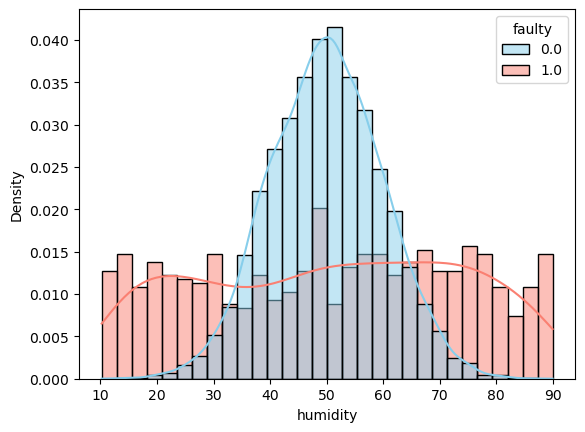

In [16]:
sns.histplot(
    data=data_csv,
    x=col,
    hue='faulty',
    kde=True,
    bins=30,
    stat='density',
    common_norm=False,  
    alpha=0.5,
    palette=['skyblue', 'salmon']
)


# Fitting an explainer module

In [10]:
subset = X_test_scaled[:1000]  
explainer = shap.KernelExplainer(lambda x: ocsvm.decision_function(x), X_train_scaled)
shap_values = explainer.shap_values(subset)

Using 5524 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:10<00:00,  2.70it/s]


In [11]:
import shap
shap.initjs()

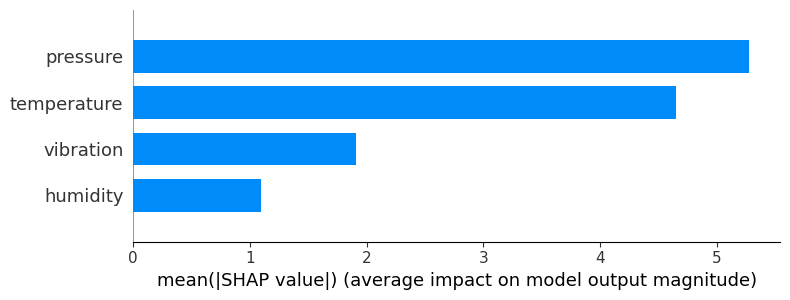

In [19]:
subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)
shap.summary_plot(shap_values, subset_df, plot_type="bar")

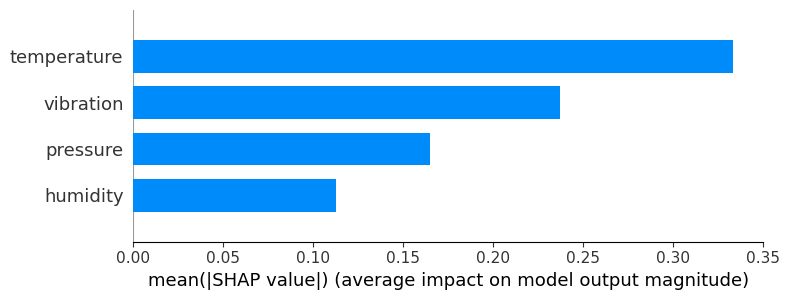

In [23]:
subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)
shap.summary_plot(shap_values, subset_df, plot_type="bar")

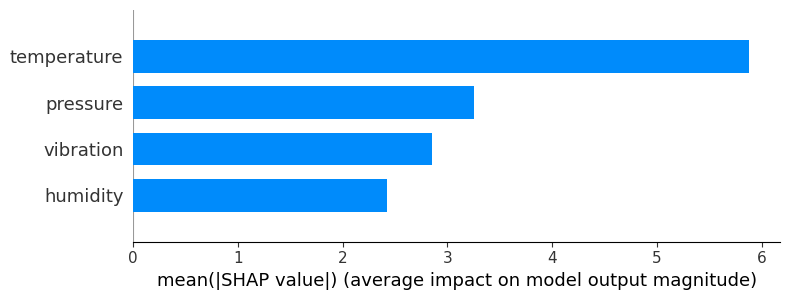

In [23]:
import pandas as pd
subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)
shap.summary_plot(shap_values, subset_df, plot_type="bar")

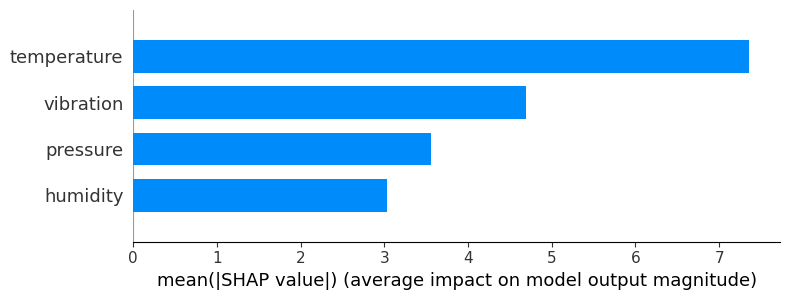

In [27]:
import pandas as pd


subset_df = pd.DataFrame(subset, columns=no_faulty_train.columns)

shap.summary_plot(shap_values, subset_df, plot_type="bar")

# Sensitivity analysis of both models

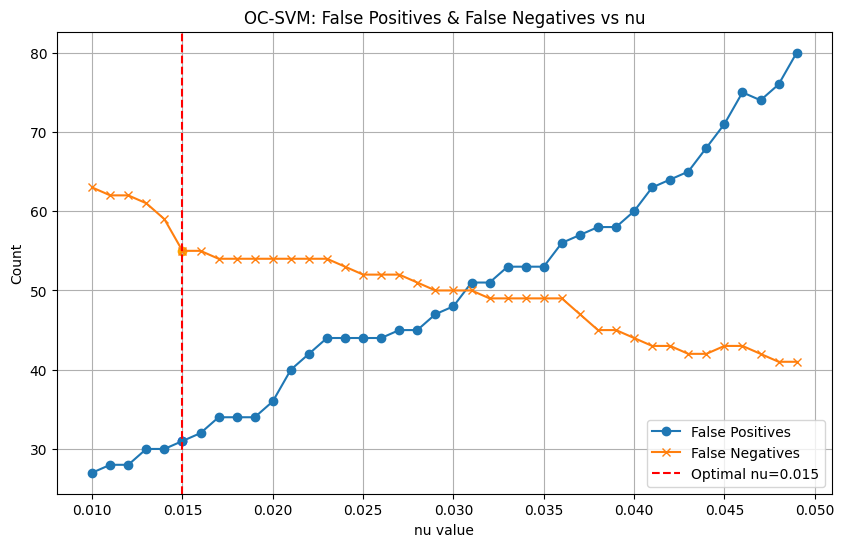

Optimal nu: 0.015
FP at optimal nu: 31, FN at optimal nu: 55
Total misclassifications: 86


In [12]:
nu_values = np.arange(0.01, 0.05, 0.001)
FP_list = []
FN_list = []

for nu in nu_values:
    ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=nu)
    ocsvm.fit(X_train_scaled)

    y_pred = ocsvm.predict(X_test_scaled)  
    y_pred_binary = np.where(y_pred == -1, 1, 0)  

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    
    FP_list.append(fp)
    FN_list.append(fn)


total_error = np.array(FP_list) + np.array(FN_list)
best_idx = np.argmin(total_error)
best_nu = nu_values[best_idx]
best_FP = FP_list[best_idx]
best_FN = FN_list[best_idx]

plt.figure(figsize=(10,6))
plt.plot(nu_values, FP_list, label='False Positives', marker='o')
plt.plot(nu_values, FN_list, label='False Negatives', marker='x')
plt.axvline(best_nu, color='r', linestyle='--', label=f'Optimal nu={best_nu:.3f}')
plt.scatter(best_nu, best_FP, color='blue')  
plt.scatter(best_nu, best_FN, color='orange')
plt.xlabel('nu value')
plt.ylabel('Count')
plt.title('OC-SVM: False Positives & False Negatives vs nu')
plt.legend()
plt.grid(True)
plt.show()
print(f"Optimal nu: {best_nu:.3f}")
print(f"FP at optimal nu: {best_FP}, FN at optimal nu: {best_FN}")
print(f"Total misclassifications: {best_FP + best_FN}")

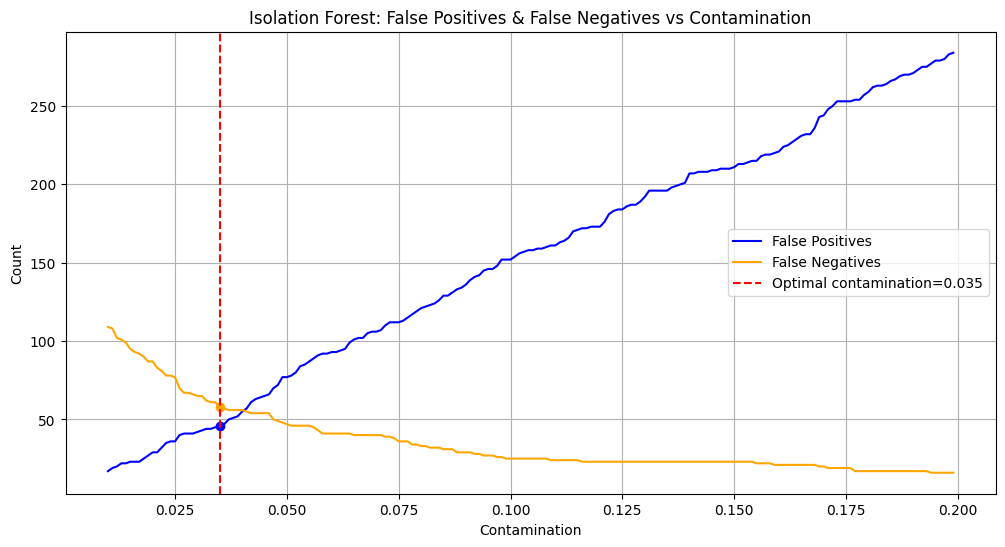

Optimal contamination: 0.035
FP at optimal contamination: 46, FN at optimal contamination: 58
Total misclassifications: 104


In [21]:


cont_values = np.arange(0.01, 0.2, 0.001) 
FP_list = []
FN_list = []
num_normal = sum(y_test == 0)
num_faulty = sum(y_test == 1)


for cont in cont_values:

    iso_forest = IsolationForest(n_estimators=100, contamination=cont, random_state=42)
    iso_forest.fit(X_train_scaled)
    

    y_pred = iso_forest.predict(X_test_scaled) 
    y_pred_binary = np.where(y_pred == -1, 1, 0) 
    

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    
    FP_list.append(fp)
    FN_list.append(fn)


total_error = np.array(FP_list) + np.array(FN_list)
best_idx = np.argmin(total_error)
best_cont = cont_values[best_idx]
best_FP = FP_list[best_idx]
best_FN = FN_list[best_idx]

plt.figure(figsize=(12,6))
plt.plot(cont_values, FP_list, label='False Positives', color='blue')
plt.plot(cont_values, FN_list, label='False Negatives', color='orange')
plt.axvline(best_cont, color='red', linestyle='--', label=f'Optimal contamination={best_cont:.3f}')
plt.scatter(best_cont, best_FP, color='blue')
plt.scatter(best_cont, best_FN, color='orange')
plt.xlabel('Contamination')
plt.ylabel('Count')
plt.title('Isolation Forest: False Positives & False Negatives vs Contamination')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print summary
print(f"Optimal contamination: {best_cont:.3f}")
print(f"FP at optimal contamination: {best_FP}, FN at optimal contamination: {best_FN}")
print(f"Total misclassifications: {best_FP + best_FN}")


Evaluating the decision boundary of the One svm using the anamoly score of the one SVM model

              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



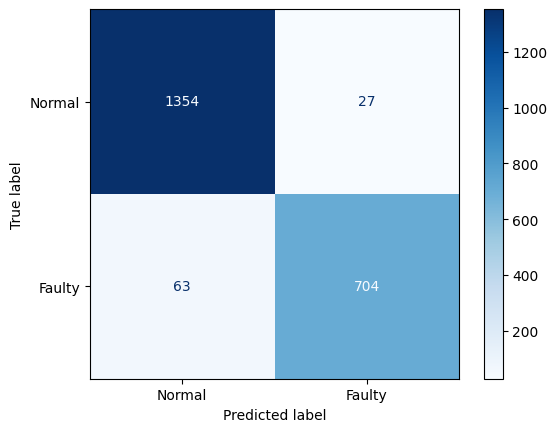

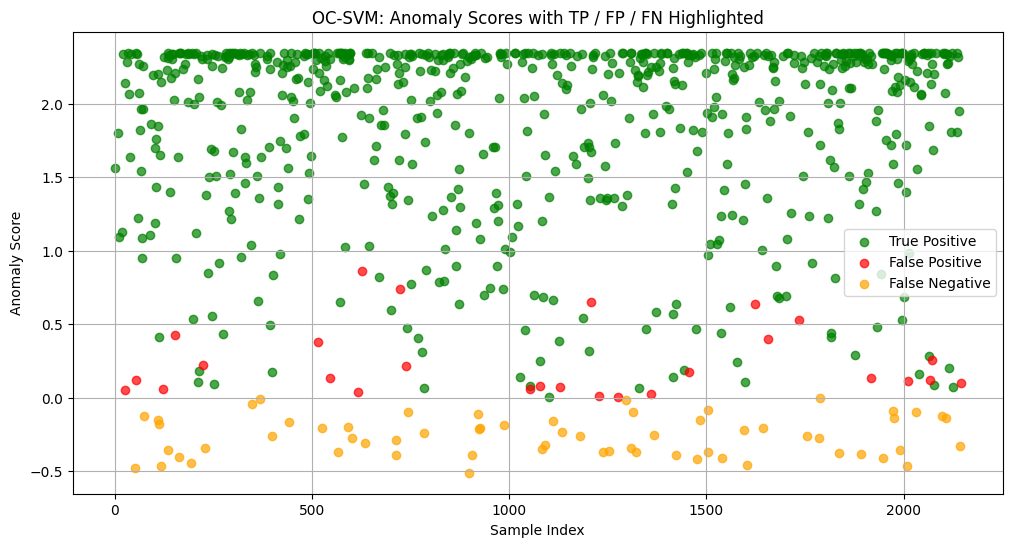

In [28]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train)
X_test_scaled = scaler.transform(X_test)

ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)


y_pred = ocsvm.predict(X_test_scaled)

y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  
sample_idx = np.arange(len(y_test))

# True positives: predicted faulty AND actually faulty
tp_idx = np.where((y_pred_binary == 1) & (y_test == 1))[0]
# False positives: predicted faulty BUT actually normal
fp_idx = np.where((y_pred_binary == 1) & (y_test == 0))[0]
# False negatives: predicted normal BUT actually faulty
fn_idx = np.where((y_pred_binary == 0) & (y_test == 1))[0]

plt.figure(figsize=(12,6))
plt.scatter(tp_idx, anomaly_scores[tp_idx], color='green', label='True Positive', alpha=0.7)
plt.scatter(fp_idx, anomaly_scores[fp_idx], color='red', label='False Positive', alpha=0.7)
plt.scatter(fn_idx, anomaly_scores[fn_idx], color='orange', label='False Negative', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.title('OC-SVM: Anomaly Scores with TP / FP / FN Highlighted')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



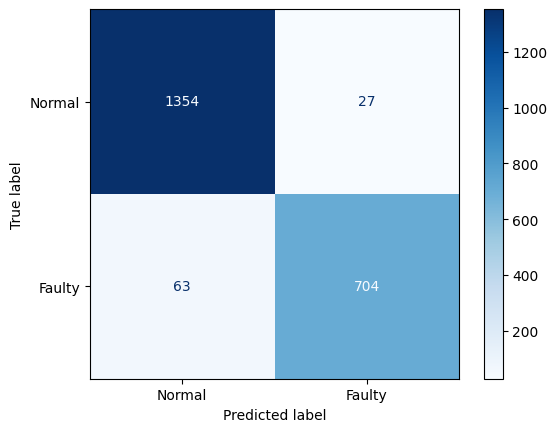

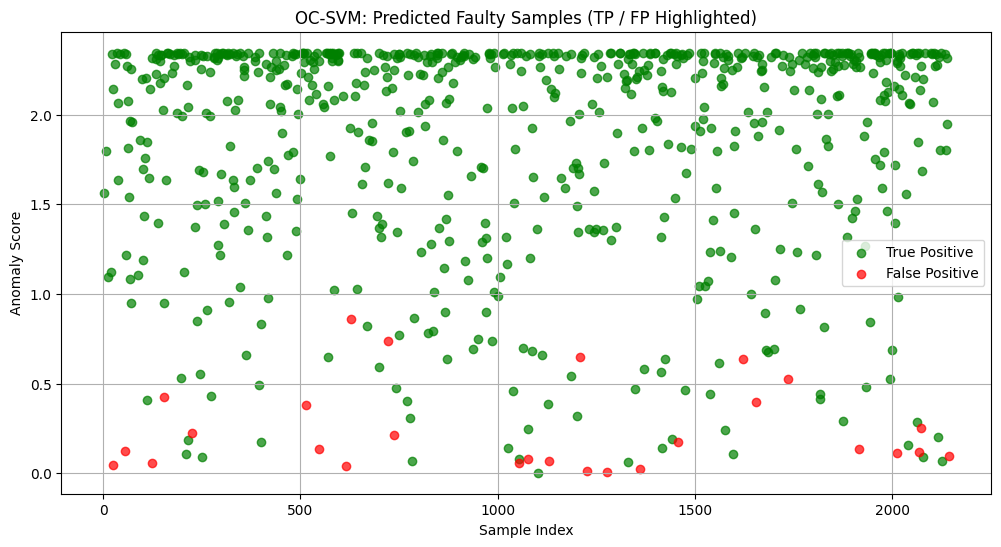

In [29]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train) 
X_test_scaled = scaler.transform(X_test)

ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

y_pred = ocsvm.predict(X_test_scaled)

y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])

print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  


pred_faulty_idx = np.where(y_pred_binary == 1)[0]


tp_idx = [i for i in pred_faulty_idx if y_test[i] == 1]  
fp_idx = [i for i in pred_faulty_idx if y_test[i] == 0] 

# Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(tp_idx, anomaly_scores[tp_idx], color='green', label='True Positive', alpha=0.7)
plt.scatter(fp_idx, anomaly_scores[fp_idx], color='red', label='False Positive', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.title('OC-SVM: Predicted Faulty Samples (TP / FP Highlighted)')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      1381
      Faulty       0.96      0.92      0.94       767

    accuracy                           0.96      2148
   macro avg       0.96      0.95      0.95      2148
weighted avg       0.96      0.96      0.96      2148



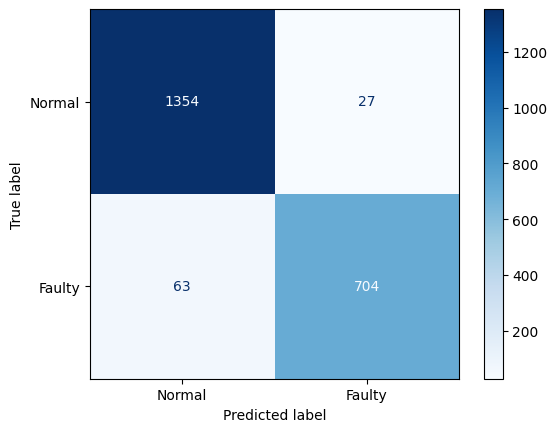

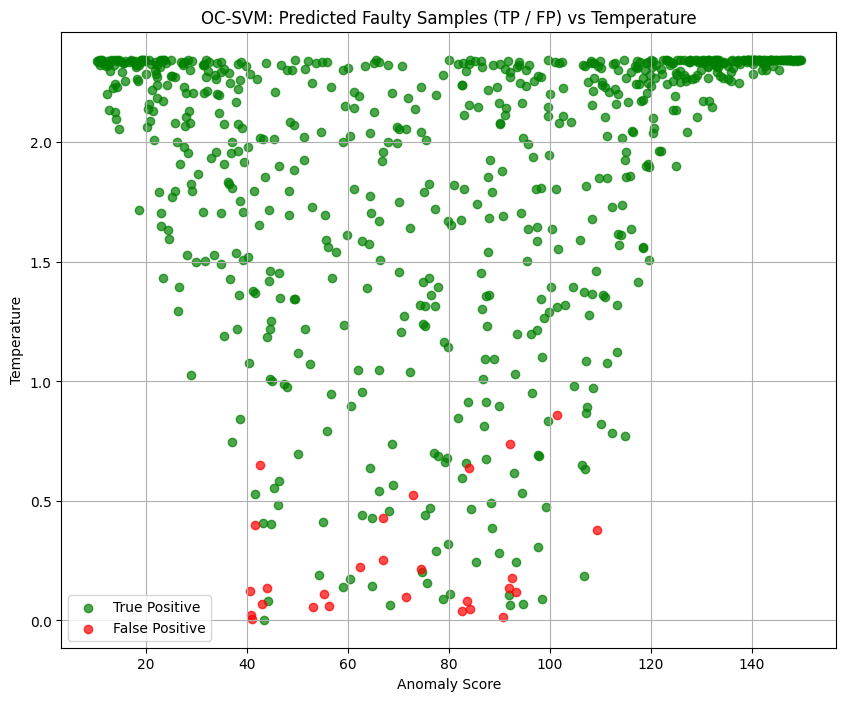

In [32]:


temperature = X_test['temperature'].values  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(no_faulty_train) 
X_test_scaled = scaler.transform(X_test)


ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_train_scaled)

y_pred = ocsvm.predict(X_test_scaled)

y_pred_binary = np.array([0 if i == 1 else 1 for i in y_pred])


print(classification_report(y_test, y_pred_binary, target_names=['Normal','Faulty']))
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal','Faulty'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# ----------------------------
# Compute anomaly scores
# ----------------------------
scores = ocsvm.decision_function(X_test_scaled)
anomaly_scores = -scores  # higher = more anomalous

# ----------------------------
# Only predicted faulty samples
# ----------------------------
pred_faulty_idx = np.where(y_pred_binary == 1)[0]


tp_idx = [i for i in pred_faulty_idx if y_test[i] == 1] 
fp_idx = [i for i in pred_faulty_idx if y_test[i] == 0] 

# Scatter plot: anomaly score vs temperature
plt.figure(figsize=(10,8))
plt.scatter(temperature[tp_idx],anomaly_scores[tp_idx] , color='green', label='True Positive', alpha=0.7)
plt.scatter(temperature[fp_idx], anomaly_scores[fp_idx], color='red', label='False Positive', alpha=0.7)

plt.xlabel('Anomaly Score')
plt.ylabel('Temperature')
plt.title('OC-SVM: Predicted Faulty Samples (TP / FP) vs Temperature')
plt.legend()
plt.grid(True)
plt.show()
